#### Time complexity Comparison between Algorithm A and Algorithm B


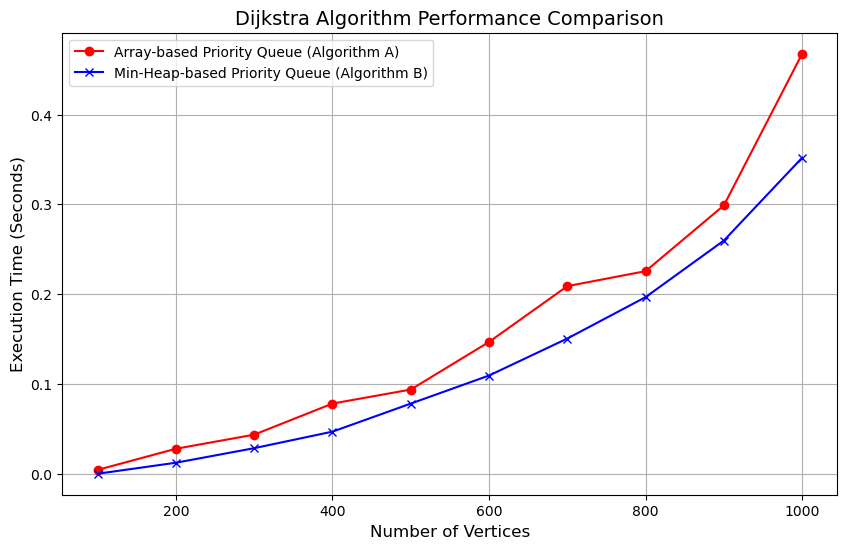

In [2]:
import numpy as np
import time
import heapq
import matplotlib.pyplot as plt

# Dijkstra's algorithm using array-based priority queue (Algorithm A)
def dijkstra_array(graph, src):
    V = len(graph)
    dist = [float('inf')] * V
    dist[src] = 0
    visited = [False] * V

    for _ in range(V):
        u = min_distance(dist, visited)
        visited[u] = True

        for v in range(V):
            if graph[u][v] > 0 and not visited[v] and dist[u] != float('inf') and dist[u] + graph[u][v] < dist[v]:
                dist[v] = dist[u] + graph[u][v]
    return dist

# Dijkstra's algorithm using min-heap (Algorithm B)
def dijkstra_heap(graph, src):
    V = len(graph)
    dist = [float('inf')] * V
    dist[src] = 0
    min_heap = [(0, src)]  # (distance, vertex)
    
    while min_heap:
        d, u = heapq.heappop(min_heap)
        
        if d > dist[u]:
            continue
        
        for v in range(V):
            if graph[u][v] > 0:
                alt = dist[u] + graph[u][v]
                if alt < dist[v]:
                    dist[v] = alt
                    heapq.heappush(min_heap, (dist[v], v))
    
    return dist

# Generate a random graph with V vertices and E edges
def generate_random_graph(V, E):
    graph = np.zeros((V, V))
    edge_count = 0
    while edge_count < E:
        u = np.random.randint(0, V)
        v = np.random.randint(0, V)
        if u != v and graph[u][v] == 0:  # Prevent duplicate edges
            weight = np.random.randint(1, 10)
            graph[u][v] = weight
            graph[v][u] = weight  # Undirected graph
            edge_count += 1
    return graph

# Comparison of both algorithms based on runtime
def compare_algorithms():
    vertices = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]  # Number of vertices
    edges = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]  # Corresponding number of edges
    
    array_times = []
    heap_times = []
    
    for V, E in zip(vertices, edges):
        graph = generate_random_graph(V, E)
        src = 0

        # Measure runtime for Algorithm A (Array-based)
        start_time = time.time()
        dijkstra_array(graph, src)
        end_time = time.time()
        array_time = end_time - start_time
        array_times.append(array_time)
        
        # Measure runtime for Algorithm B (Min-Heap-based)
        start_time = time.time()
        dijkstra_heap(graph, src)
        end_time = time.time()
        heap_time = end_time - start_time
        heap_times.append(heap_time)

    return vertices, edges, array_times, heap_times

# Run the comparison and plot the results
def plot_comparison():
    vertices, edges, array_times, heap_times = compare_algorithms()
    
    # Plotting
    plt.figure(figsize=(10, 6))
    
    plt.plot(vertices, array_times, label='Array-based Priority Queue (Algorithm A)', marker='o', linestyle='-', color='r')
    plt.plot(vertices, heap_times, label='Min-Heap-based Priority Queue (Algorithm B)', marker='x', linestyle='-', color='b')
    
    plt.xlabel('Number of Vertices', fontsize=12)
    plt.ylabel('Execution Time (Seconds)', fontsize=12)
    plt.title('Dijkstra Algorithm Performance Comparison', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the plotting function
plot_comparison()

